Import Modul

In [1]:
import pandas as pd
from sklearn.metrics import r2_score
from datetime import datetime
import numpy as np

import sklearn
import matplotlib.pyplot as plt


Load dataset

In [2]:
# load dataset
data = pd.read_csv('Data_electricityConsumption_weather_4.csv')
data

,TIME,Temperature,humidity,Wind_Speed,Rain_rate,Electricity_Consumption
0,2017-01-01 00:00:00+01:00,6.00,88,2,0.0,24635
1,2017-01-01 01:00:00+01:00,6.00,95,1,0.0,23627
2,2017-01-01 02:00:00+01:00,6.00,88,2,0.0,22143
3,2017-01-01 03:00:00+01:00,4.00,95,2,0.0,20849
4,2017-01-01 04:00:00+01:00,5.00,95,2,0.0,19862
...,...,...,...,...,...,...
17515,2018-12-30 08:00:00+01:00,2.51,95,3,0.0,30887
17516,2018-12-30 09:00:00+01:00,2.00,95,3,0.0,29969
17517,2018-12-30 10:00:00+01:00,4.49,81,3,0.0,28305
17518,2018-12-30 11:00:00+01:00,9.51,65,3,0.0,26035


Visualisasi data

In [3]:
dataku = pd.DataFrame(data)
#visualisasi data
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TIME                     17520 non-null  object 
 1   Temperature              17520 non-null  float64
 2   humidity                 17520 non-null  int64  
 3   Wind_Speed               17520 non-null  int64  
 4   Rain_rate                17520 non-null  float64
 5   Electricity_Consumption  17520 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 821.4+ KB


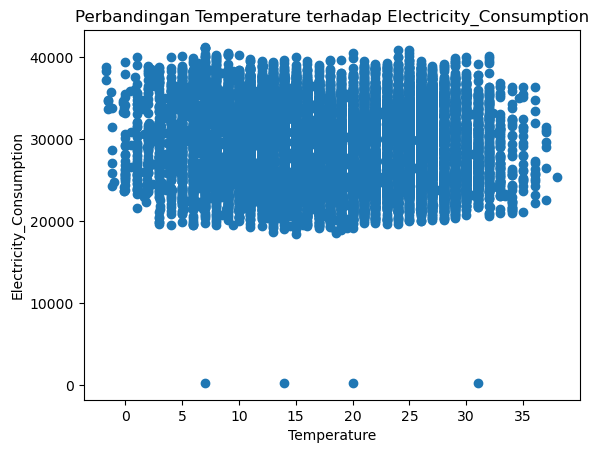

In [4]:
plt.scatter(dataku.Temperature,dataku.Electricity_Consumption)
plt.xlabel("Temperature")
plt.ylabel("Electricity_Consumption")
plt.title ("Perbandingan Temperature terhadap Electricity_Consumption")
plt.show()

In [5]:
X_temperature =dataku.Temperature.values
X_humidity =dataku.humidity.values
X_Wind_Speed =dataku.Wind_Speed.values
X_Rain_rate =dataku.Rain_rate.values
y = dataku.Electricity_Consumption.values

In [6]:
from sklearn.model_selection import train_test_split
X_temperature_train, X_temperature_test, y_train, y_test= train_test_split(X_temperature,y, test_size = 0.1, random_state=0)
X_humidity_train, X_humidity_test, y_train, y_test= train_test_split(X_humidity,y, test_size = 0.1, random_state=0)
X_Wind_Speed_train, X_Wind_Speed_test, y_train, y_test= train_test_split(X_Wind_Speed,y, test_size = 0.1, random_state=0)
X_Rain_rate_train, X_Rain_rate_test, y_train, y_test= train_test_split(X_Rain_rate,y, test_size = 0.1, random_state=0)

In [7]:
X_temperature_train= X_temperature_train.reshape(-1, 1)
X_temperature_test = X_temperature_test.reshape(-1, 1)

X_humidity_train= X_humidity_train.reshape(-1, 1)
X_humidity_test = X_humidity_test.reshape(-1, 1)

X_Wind_Speed_train= X_Wind_Speed_train.reshape(-1, 1)
X_Wind_Speed_test = X_Wind_Speed_test.reshape(-1, 1)

X_Rain_rate_train= X_Rain_rate_train.reshape(-1, 1)
X_Rain_rate_test = X_Rain_rate_test.reshape(-1, 1)



y_train= y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [8]:
#fitting
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor2 = LinearRegression()
regressor3 = LinearRegression()
regressor4 = LinearRegression()

1. Perbandingan temperature terhadap Electricity consumption

In [9]:

regressor.fit(X_temperature_train,y_train)

LinearRegression()

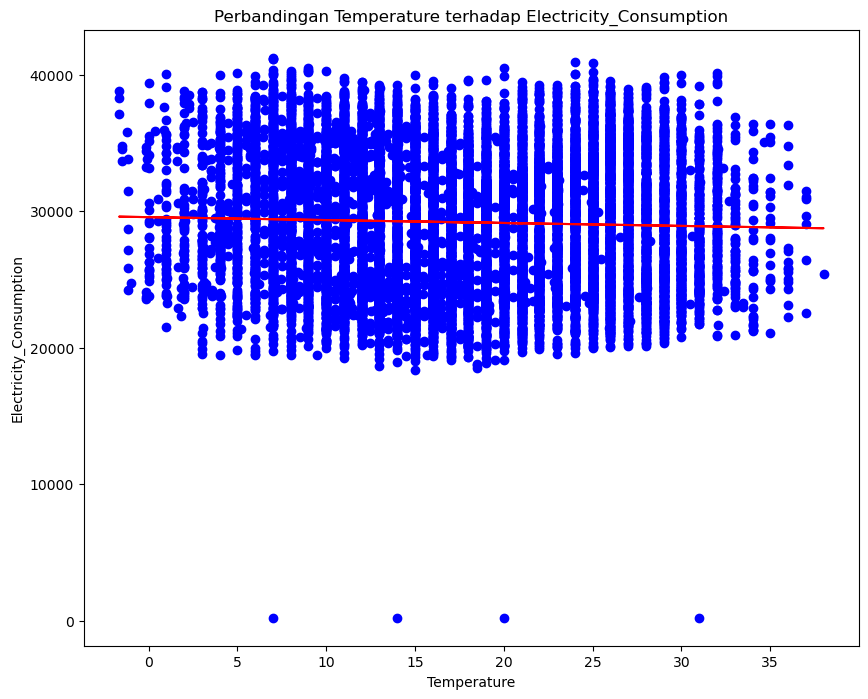

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(X_temperature_train,y_train,color = 'blue')
plt.plot(X_temperature_train,regressor.predict(X_temperature_train),color='red')
plt.xlabel("Temperature")
plt.ylabel("Electricity_Consumption")
plt.title ("Perbandingan Temperature terhadap Electricity_Consumption")
plt.show()

Ploting test data

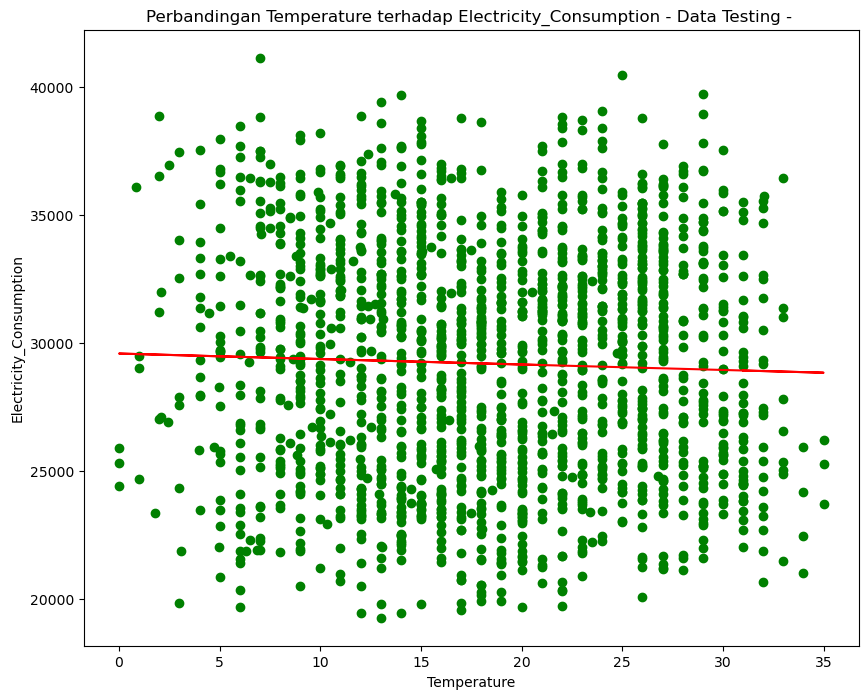

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X_temperature_test,y_test,color = 'green')
plt.plot(X_temperature_test,regressor.predict(X_temperature_test),color='red')
plt.xlabel("Temperature")
plt.ylabel("Electricity_Consumption")
plt.title ("Perbandingan Temperature terhadap Electricity_Consumption - Data Testing - ")
plt.show()

Persamaan garis untuk perbandingan Temperature terhadap Electricity Consumption

In [12]:
coef = regressor.coef_[0]
intercept = regressor.intercept_
print("Persamaan garis: y = {}x + {}".format(coef, intercept))

Persamaan garis: y = [-21.35846253]x + [29572.89135982]


2. Perbandingan humidity terhadap Electricity consumption

In [13]:

regressor2.fit(X_humidity_train,y_train)

LinearRegression()

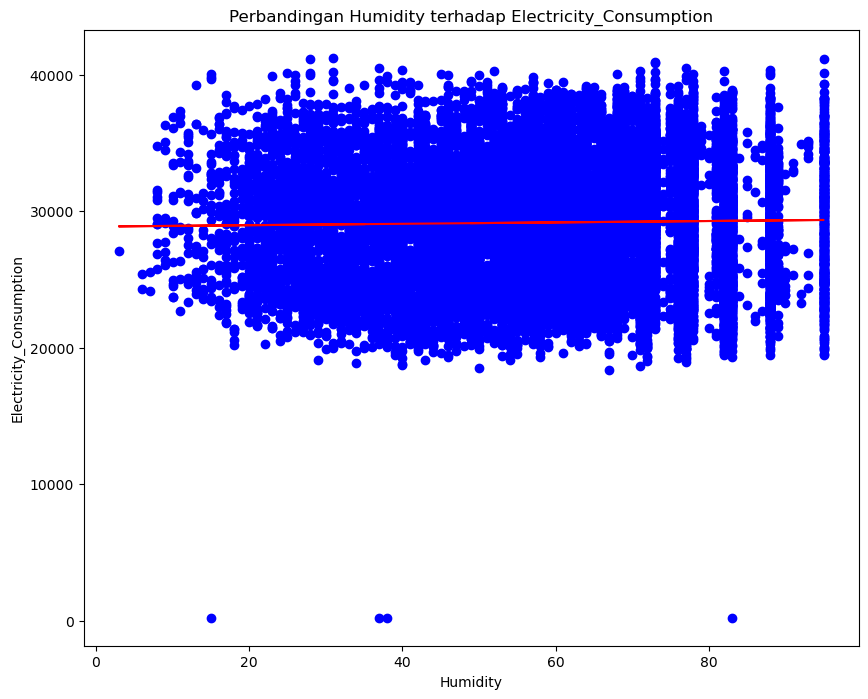

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(X_humidity_train,y_train,color = 'blue')
plt.plot(X_humidity_train,regressor2.predict(X_humidity_train),color='red')
plt.xlabel("Humidity")
plt.ylabel("Electricity_Consumption")
plt.title ("Perbandingan Humidity terhadap Electricity_Consumption")
plt.show()

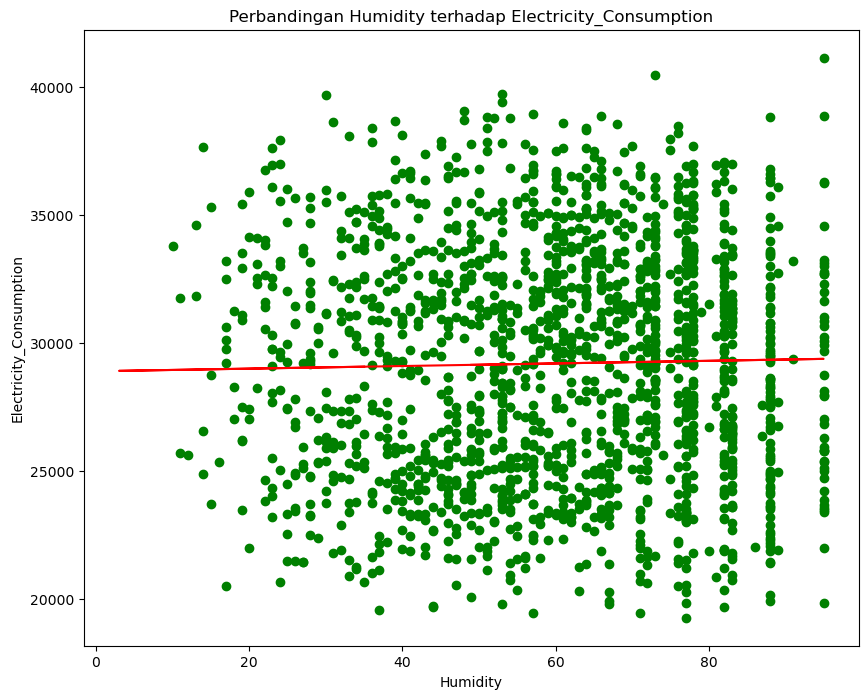

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(X_humidity_test,y_test,color = 'green')
plt.plot(X_humidity_train,regressor2.predict(X_humidity_train),color='red')
plt.xlabel("Humidity")
plt.ylabel("Electricity_Consumption")
plt.title ("Perbandingan Humidity terhadap Electricity_Consumption")
plt.show()

In [16]:
coef_humidity = regressor2.coef_[0]
intercept_humidity = regressor2.intercept_
print("Persamaan garis: y = {}x + {}".format(coef_humidity, intercept_humidity))

Persamaan garis: y = [5.09270289]x + [28881.84738613]


3. Perbandingan Wind_Speed terhadap Electricity consumption

In [17]:
regressor3.fit(X_Wind_Speed_train,y_train)

LinearRegression()

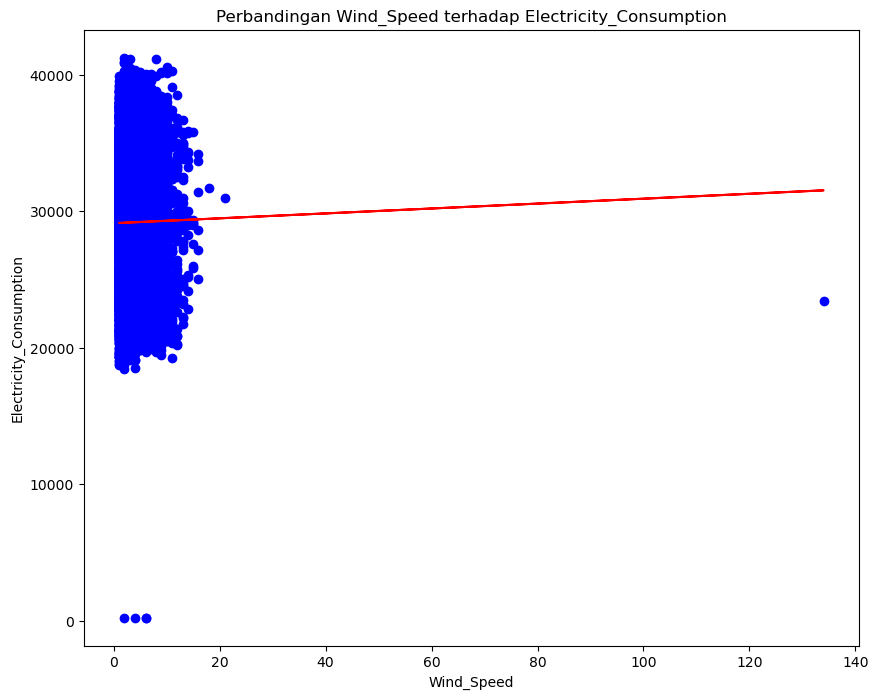

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(X_Wind_Speed_train,y_train,color = 'blue')
plt.plot(X_Wind_Speed_train,regressor3.predict(X_Wind_Speed_train),color='red')
plt.xlabel("Wind_Speed")
plt.ylabel("Electricity_Consumption")
plt.title ("Perbandingan Wind_Speed terhadap Electricity_Consumption")
plt.show()

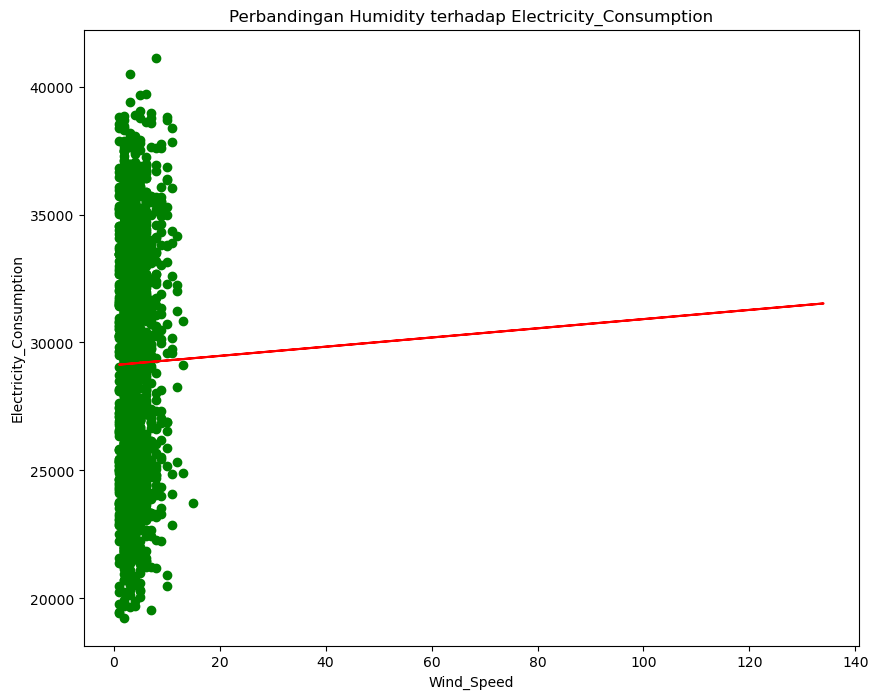

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(X_Wind_Speed_test,y_test,color = 'green')
plt.plot(X_Wind_Speed_train,regressor3.predict(X_Wind_Speed_train),color='red')
plt.xlabel("Wind_Speed")
plt.ylabel("Electricity_Consumption")
plt.title ("Perbandingan Humidity terhadap Electricity_Consumption")
plt.show()

In [23]:
coef_Wind_Speed = regressor3.coef_[0]
intercept_Wind_Speed = regressor2.intercept_
print("Persamaan garis: y = {}x + {}".format(coef_Wind_Speed, intercept_Wind_Speed))

Persamaan garis: y = [17.97238412]x + [28881.84738613]


4. Perbandingan Rain_rate terhadap Electricity consumption

In [19]:
regressor4.fit(X_Rain_rate_train,y_train)

LinearRegression()

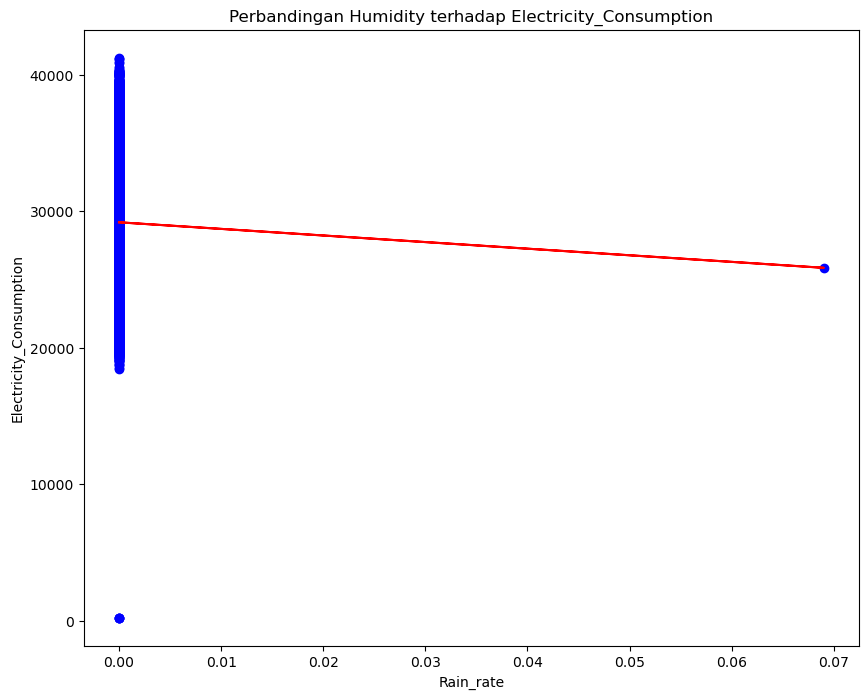

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(X_Rain_rate_train,y_train,color = 'blue')
plt.plot(X_Rain_rate_train,regressor4.predict(X_Rain_rate_train),color='red')
plt.xlabel("Rain_rate")
plt.ylabel("Electricity_Consumption")
plt.title ("Perbandingan Humidity terhadap Electricity_Consumption")
plt.show()

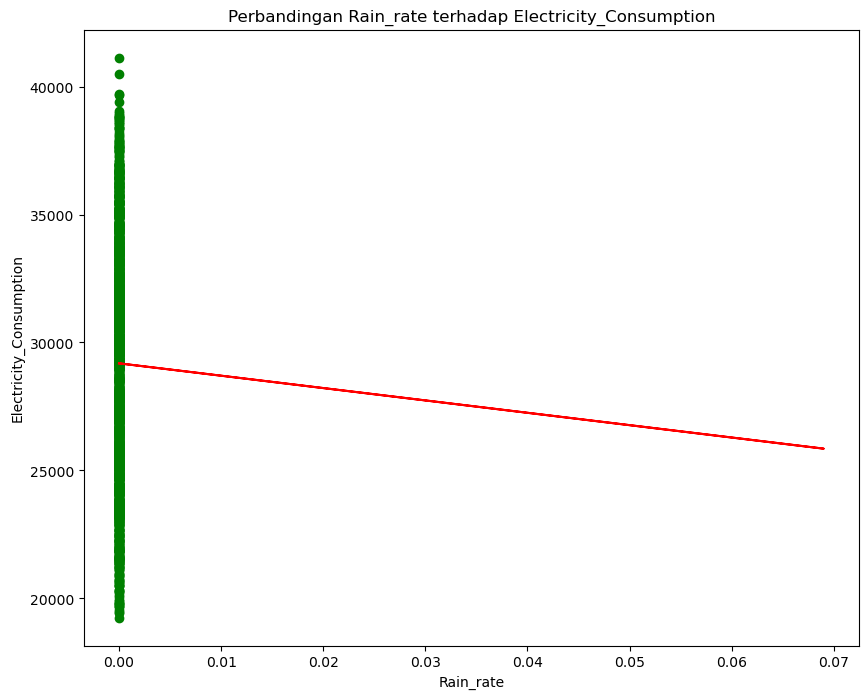

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(X_Rain_rate_test,y_test,color = 'green')
plt.plot(X_Rain_rate_train,regressor4.predict(X_Rain_rate_train),color='red')
plt.xlabel("Rain_rate")
plt.ylabel("Electricity_Consumption")
plt.title ("Perbandingan Rain_rate terhadap Electricity_Consumption")
plt.show()

In [24]:
coef_Rain_rate = regressor4.coef_[0]
intercept_Rain_rate = regressor4.intercept_
print("Persamaan garis: y = {}x + {}".format(coef_Rain_rate, intercept_Rain_rate))

Persamaan garis: y = [-48311.18194946]x + [29185.47155451]
